In [67]:
# Data Science Tools
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl

In [68]:
df = pd.read_csv("classic_mono_PEX_AUC.csv")
df.set_index(['Sample'], inplace=True)
df['TNFR2 PEX preTNFα'] = (df['TNFR2 PEX preTNFα'] - df['TNFR2 PEX preTNFα'].min()) / (df['TNFR2 PEX preTNFα'].max() - df['TNFR2 PEX preTNFα'].min())
df['TNFR2 PEX postTNFα'] = (df['TNFR2 PEX postTNFα'] - df['TNFR2 PEX postTNFα'].min()) / (df['TNFR2 PEX postTNFα'].max() - df['TNFR2 PEX postTNFα'].min())
df = df.iloc[0:6]
df

,TNFR1 PEX preTNFα,TNFR1 PEX postTNFα,TNFR2 PEX preTNFα,TNFR2 PEX postTNFα,TNFα AUC preTNFα,TNFα AUC postTNFα
Sample,,,,,,
Classic Monocytes N 1,0.501978,0.278019,0.448910,0.225668,0.403225,0.569961
Classic Monocytes N 2,0.668852,0.356900,0.479167,0.276918,0.443137,0.593986
Classic Monocytes N 3,0.579222,0.266474,0.423133,0.155390,0.411016,0.572710
Classic Monocytes RA 1,0.621001,0.364400,0.207806,0.135845,0.282019,0.436429
Classic Monocytes RA 2,0.602732,0.379784,0.273040,0.182389,0.376028,0.466285
Classic Monocytes RA 3,0.497581,0.361080,0.226825,0.109545,0.355867,0.459324


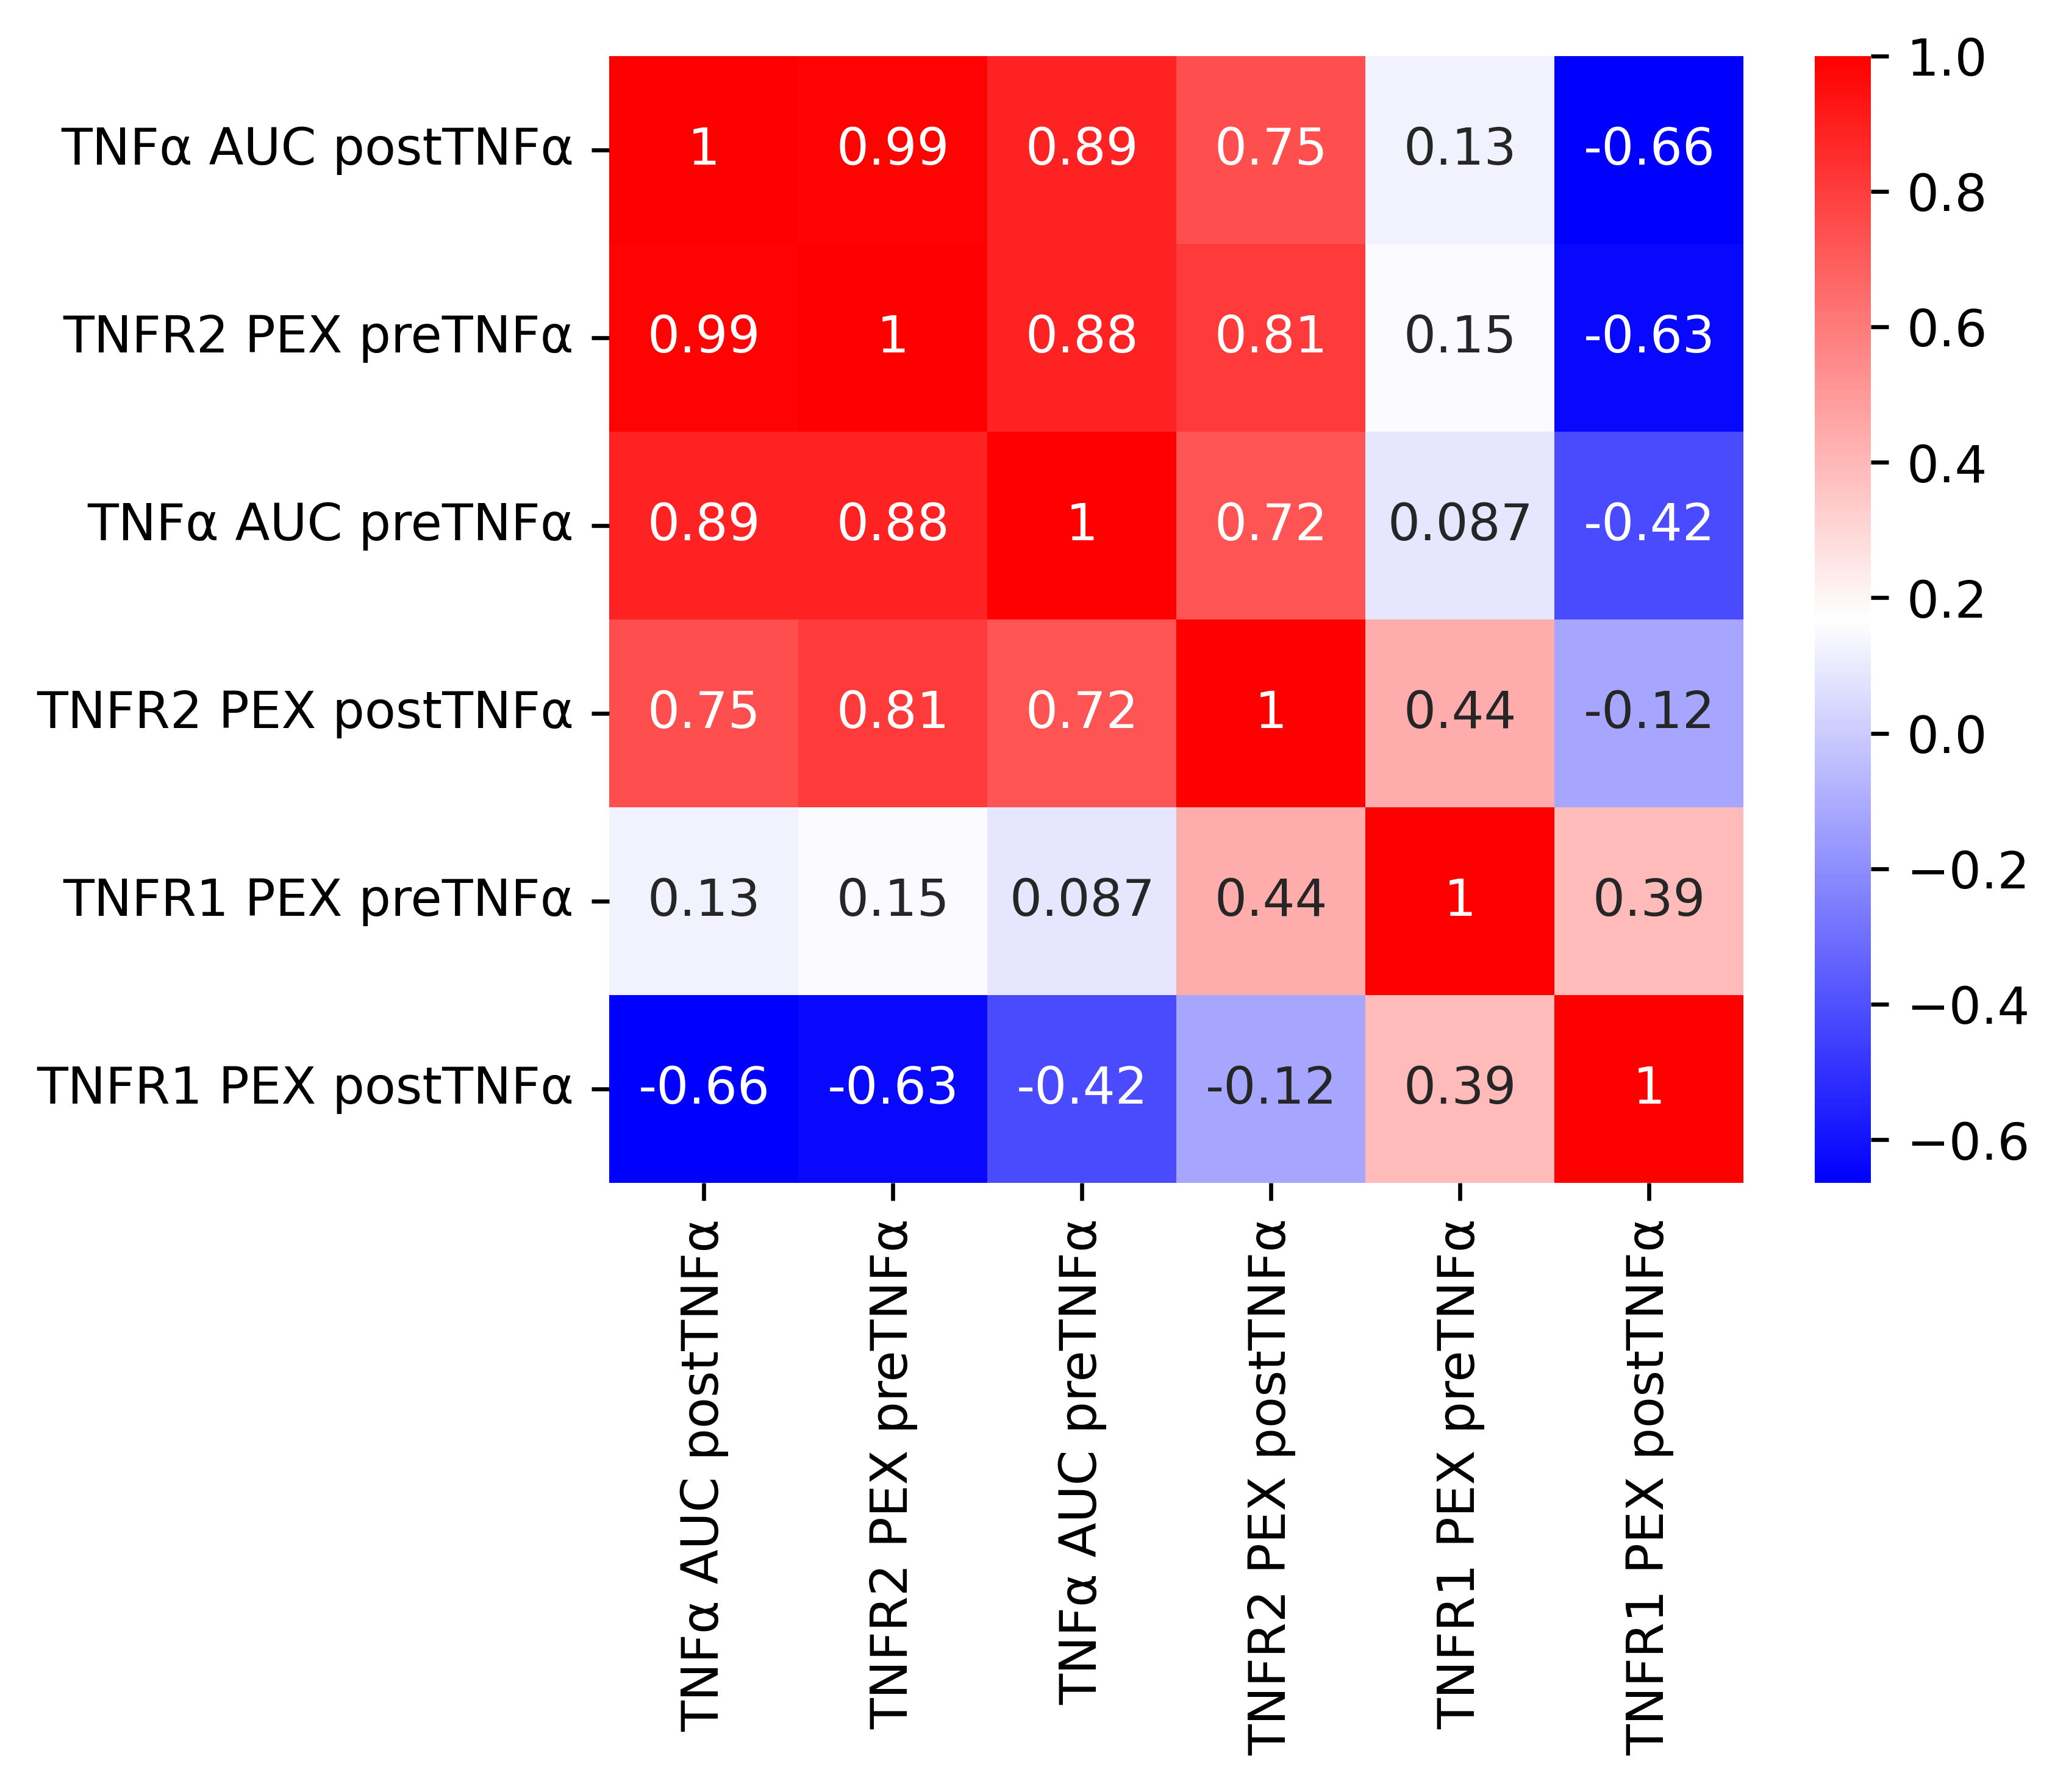

In [69]:
fig, ax = plt.subplots(figsize=(5,4), dpi=600)      
ax = sns.heatmap(df.corr().sort_values(by=['TNFα AUC postTNFα'],
                                          ascending=False, axis=0).sort_values(by=['TNFα AUC postTNFα'], 
                                                                               ascending=False, axis=1),
                 cmap="bwr",
                 annot=True)
plt.savefig('Threshold Analysis Correlation.png', bbox_inches='tight')

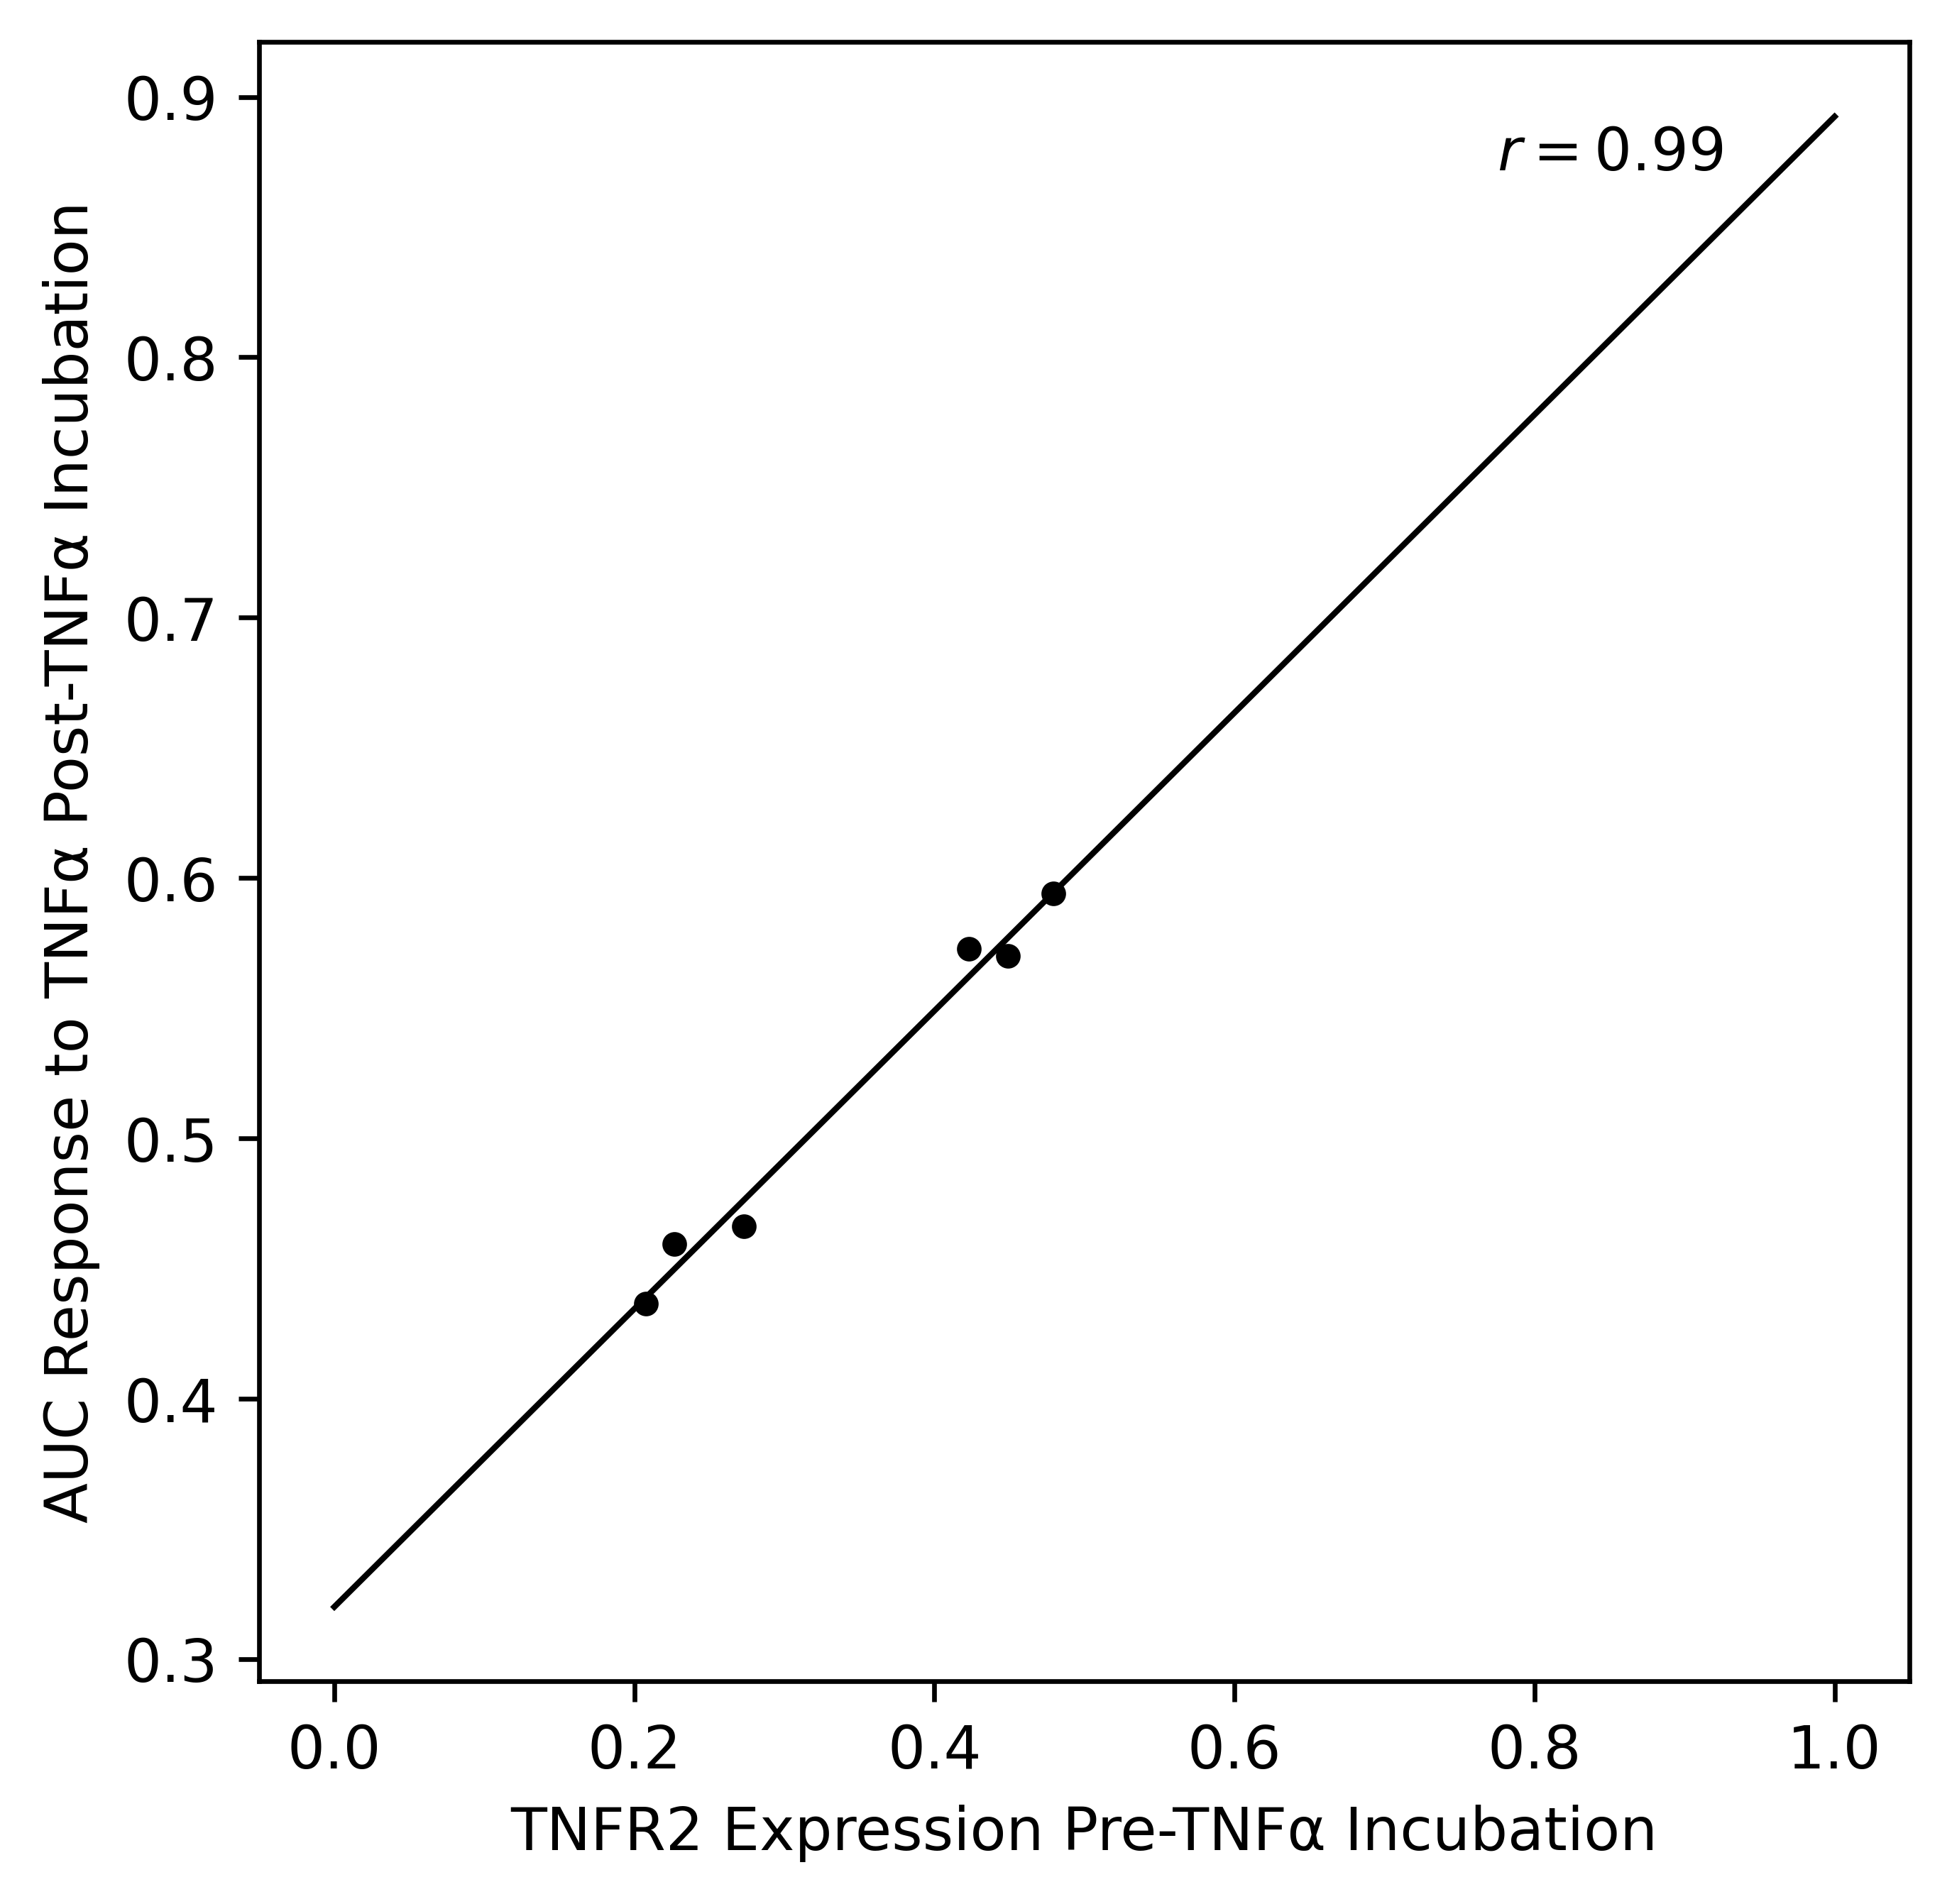

In [93]:
trim = df
x = trim['TNFR2 PEX preTNFα']
y = trim['TNFα AUC postTNFα']

# Fit a linear regression model (degree=1)
model = np.poly1d(np.polyfit(x, y, 1))

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(x, y)

# Define a range for the regression line
line = np.linspace(0,1,10)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.scatter(x, y, c='black', s=10)
ax.plot(line, model(line), color='black', linewidth=1)

# Add title and labels
# plt.title('TNFR2 PEX Pre-TNFα vs AUC')
plt.xlabel('TNFR2 Expression Pre-TNFα Incubation')
plt.ylabel('AUC Response to TNFα Post-TNFα Incubation')

# Add r value to the plot
ax.text(0.75, 0.95, f"$r = {r:.2f}$", transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Save the plot
plt.savefig('TNFR2post_AUC_Plot.png', bbox_inches='tight')
plt.show()

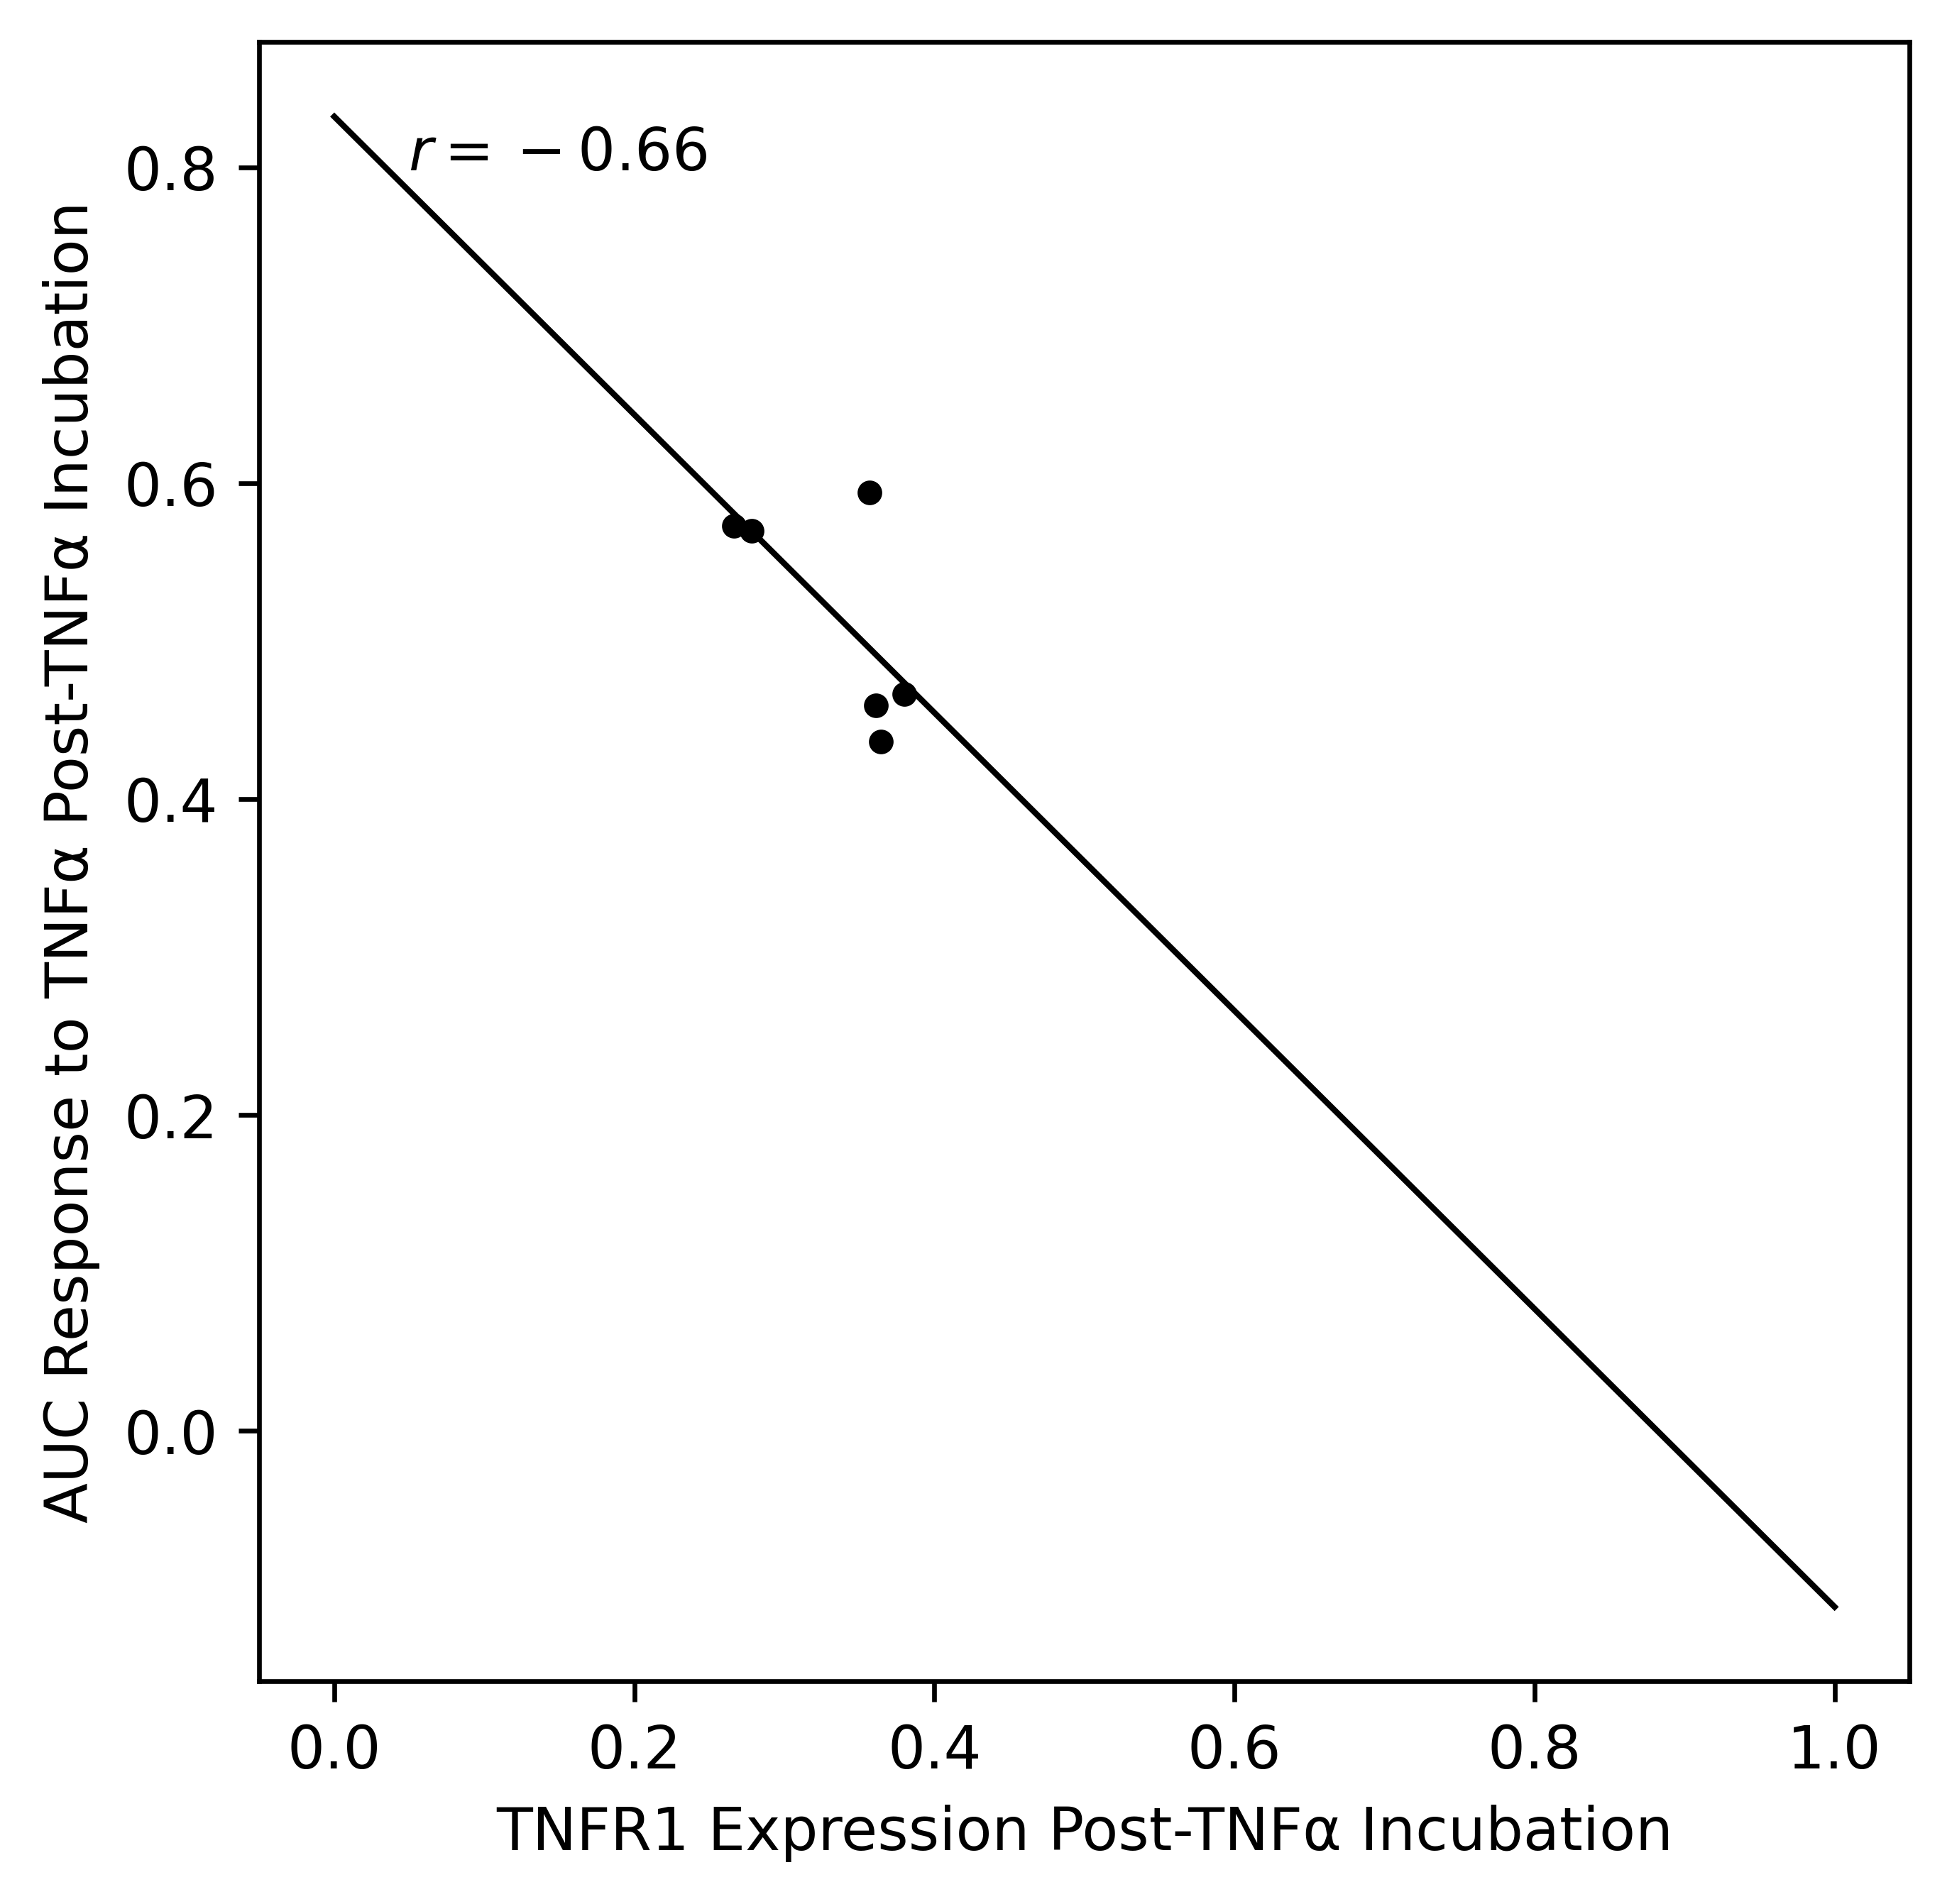

In [94]:
trim = df
x = trim['TNFR1 PEX postTNFα']
y = trim['TNFα AUC postTNFα']

# Fit a linear regression model (degree=1)
model = np.poly1d(np.polyfit(x, y, 1))

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(x, y)

# Define a range for the regression line
line = np.linspace(0,1,10)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.scatter(x, y, c='black', s=10)
ax.plot(line, model(line), color='black', linewidth=1)

# Add title and labels
# plt.title('TNFR1 PEX Post-TNFα vs AUC')
plt.xlabel('TNFR1 Expression Post-TNFα Incubation')
plt.ylabel('AUC Response to TNFα Post-TNFα Incubation')

# Add r value to the plot
ax.text(0.09, 0.95, f"$r = {r:.2f}$", transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Save the plot
plt.savefig('TNFR1post_AUC_Plot.png', bbox_inches='tight')
plt.show()